In [6]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import mysql.connector as connection
import seaborn as sns

In [7]:
rangos_elementos = {
'ph' : [4.5,5,5.5,6],
'n' : [0.2,0.3,0.4,0.5],
'mo' : [5,10,15,20],
'k' : [0.2,0.4,0.6,0.8],
'ca' : [1.5,3,5,6],
'mg' : [0.6,1.2,1.8,2.4],
'na' : [0.02,0.04,0.06,0.08],
'al' : [0.4,0.8,1.2,1.6],
'cic' : [10,15,20,25],
'p' : [7,14,21,28],
'fe' : [70,140,210,280],
'mn' : [20,40,60,80],
'zn' : [3,6,9,12],
'cu' : [3,6,9,12],
's' : [5,10,15,20],
'b' : [0.15,0.3,0.45,0.6],
'ar' : [7,14,21,28],
'l' : [20,25,30,35],
'a' : [30,40,50,60]
}


In [52]:
años = [2021]
lista_db = []

mydb = connection.connect(host="localhost", database = 'multilab',user="root", passwd="admin",use_pure=True)
for año in años:
    query = f"Select * from muestra_{año};"
    muestras = pd.read_sql(query,mydb)
    query = f"Select * from orden_{año};"
    ordenes = pd.read_sql(query,mydb)
    query = f"Select * from solicitudes_{año};"
    solicitudes = pd.read_sql(query,mydb)
    query = f"Select * from finca;"
    finca = pd.read_sql(query,mydb)
    query = f"Select * from cliente;"
    cliente = pd.read_sql(query,mydb)
    query = f"Select * from municipios;"
    municipios = pd.read_sql(query,mydb)
    query = f"Select * from departamentos;"
    departamentos = pd.read_sql(query,mydb)
    query = f"Select * from tipo_analisis;"
    tipo_analisis = pd.read_sql(query,mydb)

mydb.close() #close the connection


In [53]:
def is_between(a, x, b):
    return min(a, b) < x < max(a, b)

In [54]:
rangos = []
for key, value in rangos_elementos.items():
    valor = muestras.iloc[0][key]
    if valor != None:
        valor = float(valor.replace(",","."))
        for i,item in enumerate(value):
            if i == 0:
                if is_between(0,valor,item):
                    rangos.append([key,value,1])
            elif i == 4:
                if is_between(item,valor,np.inf):
                    rangos.append([key,value,5])
            else:
                if is_between(value[i-1],valor,value[i]):
                    rangos.append([key,value,i+1])
        

            



In [55]:
df = pd.DataFrame(rangos, columns=['Elemento', 'Valor',"Rango"])


In [56]:
from PyPDF2 import PdfFileWriter, PdfFileReader
from reportlab.pdfbase import pdfmetrics
import io
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase.pdfmetrics import stringWidth
from reportlab.rl_config import defaultPageSize
import matplotlib.pyplot as plt
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg


In [57]:
ordenes.columns

Index(['codigo', 'fecha_solicitud', 'tipo_solicitud', 'numero_solicitud',
       'clase_analisis', 'codigo_solicitante', 'codigo_propietario',
       'codigo_finca', 'proyecto', 'muestras', 'valor_servicio',
       'numero_factura', 'recibe', 'reporta', 'fecha', 'email', 'mensajeria',
       'personal', 'tipo_entrega', 'observaciones', 'tipo_pago'],
      dtype='object')

In [58]:
cliente

,codigo,nombre,apellido,id,telefono,direccion,email,tipo
0,1000001,GERMAN JARAMILLO,,*****,8504110,,,1
1,1000002,JOHANA LOPEZ,,*****,*****,,,1
2,1000003,CONDOMINIO RIBERAS LAS MERCEDE,,*****,*****,,,1
3,1000004,IVAN JARAMILLO HOYOS,,*****,8504110,,,1
4,1000005,JOSE IGNACIO LONDOÃ‘O,,*****,8504110,,,1
...,...,...,...,...,...,...,...,...
164955,1148157,TERESA DE JESUS OSORIO,,**********,**********,**********,**********,1
164956,1148158,FORTALECIMIENTO DE LA CAFICULTURA 393,,**********,**********,**********,**********,0
164957,1148159,CARLOS ALBERTO SERNA,,**********,**********,**********,**********,1
164958,1148160,FORTALECIMIENTO DE LA CAFICULTURA 400,,**********,**********,**********,**********,0


In [59]:
finca

,codigo,propietario,nombre,vereda,departamento,municipio,area,unidades_area,msnm
0,1000001,1000001,BERLIN,LA FLORESTA,17,334,,0,
1,1000002,1000002,EL JARDIN,EL SOCORRO,17,354,,0,
2,1000003,1000003,CONDOMINIO RIBERAS LAS MERCEDES,************,76,1049,,0,
3,1000004,1000004,ARBOL SOLO,***********,0,0,,0,
4,1000005,1000005,COVEÃ‘ITAS,LA PLATA,17,344,,0,
...,...,...,...,...,...,...,...,...,...
86261,1076433,1148153,LA GUACA,EL TIGRE,17,348,,0,
86262,1076434,1148155,LAS DELGADITAS,SAN PABLO,17,348,,0,
86263,1076435,1148157,LA VILLA,MARAPRA,17,331,,0,
86264,1076436,1148159,EL JARDIN,CHAPATA,17,331,,0,


In [60]:
municipios

,codigo_municipio,codigo_depto,nombre
0,1,11,SANTAFE DE BOGOTA
1,2,91,PUERTO NARI?O
2,3,91,LETICIA
3,4,5,MEDELLIN
4,5,5,ABEJORRAL
...,...,...,...
1075,1076,99,SANTA ROSALIA
1076,1077,99,CUMARIBO
1077,1078,15,CHITARAQUE
1078,1079,19,SUCRE


In [67]:
from datetime import datetime

def get_description(c_lab,muestras,ordenes,cliente,municipios,finca,tipo_analisis):
    n_orden = muestras[muestras["codigo"] == c_lab]["orden"].values[0]
    orden =  ordenes[ordenes["codigo"] == n_orden]
    c_muestras = orden["muestras"].values[0]
    fecha_solicitud = orden["fecha_solicitud"].values[0]
    fecha_solicitud = np.datetime_as_string(fecha_solicitud, unit='D')
    fecha_entrega = datetime.today().strftime('%Y-%m-%d')
    proyecto = orden["proyecto"].values[0]
    codigo_solicitante = orden["codigo_solicitante"].values[0]
    solicitante = cliente[cliente["codigo"] == codigo_solicitante]["nombre"].values[0]
    codigo_propietario = orden["codigo_propietario"].values[0]
    propietario = cliente[cliente["codigo"] == codigo_propietario]["nombre"].values[0]
    codigo_finca = orden["codigo_finca"].values[0]
    nombre_finca = finca[finca["codigo"] == codigo_finca]["nombre"].values[0]
    vereda = finca[finca["codigo"] == codigo_finca]["vereda"].values[0]
    codigo_municipio = finca[finca["codigo"] == codigo_finca]["municipio"].values[0]
    analisis = tipo_analisis[tipo_analisis["codigo"]==orden["clase_analisis"].values[0]]["nombre"].values[0]
    municipio = municipios[municipios["codigo_municipio"] == codigo_municipio]["nombre"].values[0]
    diccionario1 = {"Solicitante:": solicitante, "Propietario:": propietario, 
    "Proyecto:": proyecto, "Finca:" : nombre_finca, "Vereda:": vereda,"Municipio:":municipio }
    diccionario2 = {"N. Orden:": n_orden, "N. Muestras:":c_muestras,"N. lab:": c_lab,"Fecha Recibo: ": fecha_solicitud, "Fecha Entrega:": fecha_entrega}
    return diccionario1,diccionario2,analisis
    



In [68]:
diccionario1, diccionario2,analisis = get_description(100,muestras,ordenes,cliente,municipios,finca,tipo_analisis)

In [69]:
from reportlab.lib.utils import ImageReader
from reportlab.lib.units import inch, cm
from io import StringIO

In [87]:
def remap( x, oMin, oMax, nMin, nMax ):

    #range check
    if oMin == oMax:
        print ("Warning: Zero input range")
        return None

    if nMin == nMax:
        print ("Warning: Zero output range")
        return None

    #check reversed input range
    reverseInput = False
    oldMin = min( oMin, oMax )
    oldMax = max( oMin, oMax )
    if not oldMin == oMin:
        reverseInput = True

    #check reversed output range
    reverseOutput = False   
    newMin = min( nMin, nMax )
    newMax = max( nMin, nMax )
    if not newMin == nMin :
        reverseOutput = True

    portion = (x-oldMin)*(newMax-newMin)/(oldMax-oldMin)
    if reverseInput:
        portion = (oldMax-x)*(newMax-newMin)/(oldMax-oldMin)

    result = portion + newMin
    if reverseOutput:
        result = newMax - portion

    return result

    

In [174]:
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [215]:
cdict.keys()

dict_keys(['red', 'green', 'blue', 'alpha'])

In [321]:
def generate_pdf(c_lab,muestras,ordenes,cliente,municipios,finca,tipo_analisis,rangos_elementos):
    diccionario1,diccionario2,analisis = get_description(c_lab,muestras,ordenes,cliente,municipios,finca,tipo_analisis)
    rangos = []
    for key, value in rangos_elementos.items():
        valor = muestras.iloc[c_lab][key]
        if valor != None:
            valor = float(valor.replace(",","."))
            text = key.upper() + " : " + str(valor) 
            for i in range(0,5,1):
                if i == 0:
                    if is_between(0,valor,value[i]):
                        rangos.append([text,1,1])
                if i == 4:
                    
                    if is_between(value[-1],valor,np.inf):
                        print("?")
                        rangos.append([text,5,5])
                else:
                    if is_between(value[i-1],valor,value[i]):
                        rangos.append([text,remap(valor,0,value[-1],0,5),i+1])

    df = pd.DataFrame(rangos,columns=['Elemento', 'Rango',"Puesto"])
    PAGE_WIDTH  = defaultPageSize[0]
    PAGE_HEIGHT  = defaultPageSize[1]
    print(len(df))
    plt.figure(figsize=(12,12))
    plt.title("Interpretación")
    gradient = np.linspace(0, 1, 100).reshape(1, -1)
    plt.imshow(gradient , extent=[0.5, 5.5, 0, 8], aspect='auto', cmap="jet_r",alpha=0.5)
    
    sns.set(font_scale = 1)

    plot = sns.scatterplot(data=df, y="Elemento", x="Rango",s=300,marker="v",color="black")
    plot.set_xticks([1,2,3,4,5])
    plot.set_xticklabels(["BAJO","MODERADAMENTE \n BAJO","MEDIO","MODERADAMENTE \n ALTO","ALTO"])
    plot.set_xlim([0.5,5.5])
    imgdata = io.BytesIO()
    plot.get_figure().savefig(imgdata, format='png')
    imgdata.seek(0)  # rewind the data
    Image = ImageReader(imgdata)

   

    packet = io.BytesIO()
    pdfmetrics.registerFont(TTFont('Titulo', 'ProximaNova/Proxima Nova Cond Black It.ttf'))
    pdfmetrics.registerFont(TTFont('Header', 'ProximaNova/Proxima Nova Black.ttf'))
    pdfmetrics.registerFont(TTFont('Light', 'ProximaNova/Proxima Nova Light.ttf'))
    can = canvas.Canvas(packet, pagesize=letter)
    can.setFillColorRGB(0, 0, 0)
    #### Titulo
    can.setFont("Titulo", 14)
    text = f"Reportes Suelos {analisis}"
    text_width = stringWidth(text,"Titulo",14)
    can.drawString((PAGE_WIDTH - text_width) / 2.0, 655, text)
    #### Información
    con=0
    for key,value in diccionario1.items():
        can.setFont("Header", 10)
        text = str(key)
        text_width = stringWidth(text,"Header",10)
        can.drawString((PAGE_WIDTH) / 8, 615-(con*20), text)
        can.setFont("Light", 10)
        text = str(value)
        can.drawString((PAGE_WIDTH) / 8 + text_width + 10, 615-(con*20), text)
        con+=1
    con=0
    for key,value in diccionario2.items():
        can.setFont("Header", 10)
        text = str(key)
        text_width = stringWidth(text,"Header",10)
        can.drawString((PAGE_WIDTH ) / 8 + (PAGE_WIDTH ) / 2, 615-(con*20), text)
        can.setFont("Light", 10)
        text = str(value)
        can.drawString(((PAGE_WIDTH ) / 8) + ((PAGE_WIDTH ) / 2) + text_width + 10, 615-(con*20), text)
        con+=1

     
    can.drawImage(Image, (PAGE_WIDTH) / 8, (PAGE_WIDTH ) / 2 - 150, 300, 300)
    can.save()
    can.showPage()
    
    

    packet.seek(0)
    new_pdf = PdfFileReader(packet)
    existing_pdf = PdfFileReader(open("template.pdf", "rb"))
    output = PdfFileWriter()
    page = existing_pdf.getPage(0)
    page.mergePage(new_pdf.getPage(0))
    output.addPage(page)
    outputStream = open("destination.pdf", "wb")
    output.write(outputStream)
    outputStream.close()

15


,Elemento,Rango,Puesto
0,PH : 5.2,4.333333,1
1,PH : 5.2,4.333333,3
2,N : 0.36,3.600000,1
3,N : 0.36,3.600000,3
4,MO : 8.6,2.150000,1
5,MO : 8.6,2.150000,2
6,K : 0.37,2.312500,1
7,K : 0.37,2.312500,2
8,CA : 1.64,1.366667,1
9,CA : 1.64,1.366667,2


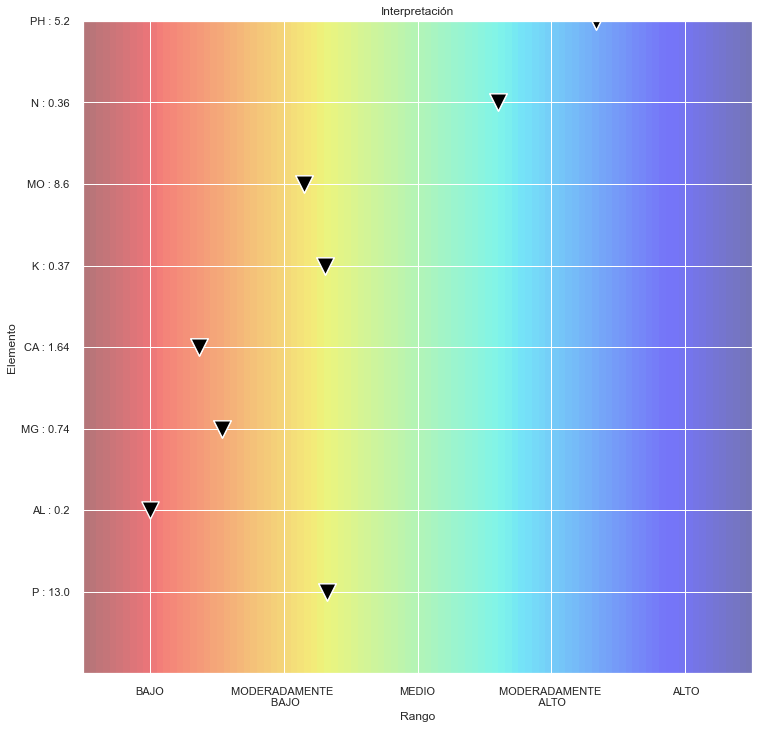

In [322]:
generate_pdf(5,muestras,ordenes,cliente,municipios,finca,tipo_analisis,rangos_elementos)

In [304]:
len(df)

8